In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("C:\\Users\\devan\\OneDrive\\Desktop\\Credit_Risk_Train_data.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#Finding Whetther the dataset contains the missing Values or not?

data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
from sklearn.metrics import accuracy_score

In [8]:
#Missing value treatment
data["Gender"].fillna("Female",inplace=True)
data["Married"].fillna("No",inplace=True)
data["Dependents"].fillna("3+",inplace=True)
data["Self_Employed"].fillna("Yes",inplace=True)
data["LoanAmount"].fillna(data["LoanAmount"].median(),inplace=True)
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].median(),inplace=True)
data["Credit_History"].fillna(data["Credit_History"].median(),inplace=True)

In [9]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
# taking first 5 data set 

data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
#  Converting the Character data into numeric using label encoder


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()


In [15]:

x = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]
for i in range(len(x)):
    data[x[i]] = label.fit_transform(data[x[i]])

In [16]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [17]:
# Initialize the data
X = data.drop(["Loan_ID","Loan_Status"],axis=1)
y = data["Loan_Status"]
X
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [19]:
#Splitting the data using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
#Fitting intpo the data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()



In [21]:
lr.fit(X_train,y_train)

C:\Users\devan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
#Prediction
y_pred = lr.predict(X_test)
y_pred[:10]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [23]:
np.array(y_test[:10])

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [24]:
#Accurcy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7886178861788617

In [25]:
lr.coef_


array([[ 1.64909729e-01,  6.53044397e-01, -1.56713004e-01,
        -3.43277648e-01,  1.48847045e-01, -4.45202663e-06,
        -6.30756378e-05, -2.06579964e-03, -4.37902378e-03,
         2.67248989e+00,  1.06205096e-01]])

In [26]:
a=pd.DataFrame(lr.coef_.T,columns={"coeff"})
b=pd.DataFrame(X.columns,columns={"col"})
c=pd.concat([a,b],axis=1)
c=c.sort_values("coeff",ascending=False)
c.col[:5].values



array(['Credit_History', 'Married', 'Gender', 'Self_Employed',
       'Property_Area'], dtype=object)

In [27]:
X = X[['Credit_History', 'Married', 'Property_Area', 'Self_Employed',
       'Gender']]

In [28]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [29]:

#Split the data with Train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
#Fitting intpo the data
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()



In [31]:
lr1.fit(X_train,y_train)

LogisticRegression()

In [32]:
#Prediction
y_pred = lr1.predict(X_test)
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [33]:
np.array(y_test[:10])

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [35]:
#Accuracy score
accuracy_score(y_test,y_pred)

0.7886178861788617

In [ ]:
# K-Nearest_Neighbour

In [36]:
data=pd.read_csv("C:\\Users\\devan\\OneDrive\\Desktop\\Credit_Risk_Train_data.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [37]:
#Missing values treatment
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
data["Gender"].mode()
data["Gender"].fillna("Male",inplace=True)
data["Married"].mode()
data["Married"].fillna("Yes",inplace=True)
data["Dependents"].mode()
data["Dependents"].fillna("0",inplace=True)
data["Self_Employed"].mode()
data["Self_Employed"].fillna("No",inplace=True)
data["LoanAmount"].fillna(data["LoanAmount"].mean(),inplace=True)
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mean(),inplace=True)
data["Credit_History"].mode()
data["Credit_History"].fillna(1.0,inplace=True)

In [40]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [41]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
x = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]
for i in range(len(x)):
    data[x[i]] = label.fit_transform(data[x[i]])

In [42]:
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [44]:
# Initialize the data
X = data.drop(["Loan_ID","Loan_Status"],axis=1)
y = data["Loan_Status"]
X
y


0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [45]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
nor = MinMaxScaler()

In [46]:
X = pd.DataFrame(nor.fit_transform(X), columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'])

In [47]:
X


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.198860,0.743590,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,0.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,0.0
610,1.0,1.0,1.000000,0.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,0.0
611,1.0,1.0,0.333333,0.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,1.0
612,1.0,1.0,0.666667,0.0,0.0,0.091936,0.000000,0.257598,0.743590,1.0,1.0


In [48]:
#Splitting the data using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)


In [51]:
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [52]:
np.array(y_test[:10])

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [53]:
#Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.7886178861788617

In [54]:
acc=[]
for i in range(1,60):
    kn = KNeighborsClassifier(n_neighbors= i)
    kn.fit(X_train,y_train)
    pred_i = kn.predict(X_test)
    acc.append(accuracy_score(y_test,pred_i))


In [56]:
np.array(acc)

array([0.74796748, 0.63414634, 0.74796748, 0.69105691, 0.76422764,
       0.69105691, 0.76422764, 0.7398374 , 0.77235772, 0.76422764,
       0.7804878 , 0.7804878 , 0.7804878 , 0.7804878 , 0.77235772,
       0.7804878 , 0.77235772, 0.77235772, 0.77235772, 0.7804878 ,
       0.76422764, 0.76422764, 0.76422764, 0.76422764, 0.76422764,
       0.77235772, 0.76422764, 0.77235772, 0.76422764, 0.76422764,
       0.74796748, 0.76422764, 0.75609756, 0.76422764, 0.76422764,
       0.76422764, 0.75609756, 0.76422764, 0.75609756, 0.75609756,
       0.74796748, 0.75609756, 0.74796748, 0.74796748, 0.7398374 ,
       0.7398374 , 0.7398374 , 0.74796748, 0.73170732, 0.73170732,
       0.73170732, 0.7398374 , 0.73170732, 0.7398374 , 0.7398374 ,
       0.7398374 , 0.7398374 , 0.7398374 , 0.72357724])

In [57]:
print(np.array(acc).max())
np.array(acc).argmax()

0.7804878048780488


10

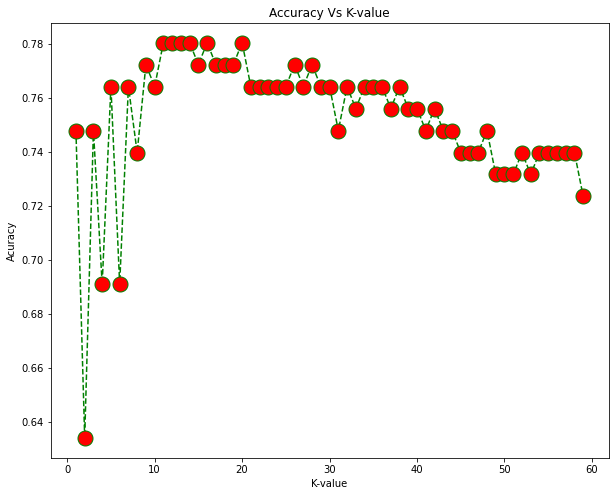

In [61]:
plt.figure(figsize=(10,8))
plt.plot(range(1,60), acc, color="Green", linestyle="dashed", marker='o', markerfacecolor="Red", markersize=15 )
plt.xlabel("K-value")
plt.ylabel("Acuracy")
plt.title("Accuracy Vs K-value")
plt.show()
